# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction

***Team: Rebecca Gergess, Tejesh Reddy Koki, Sasa Ljubisavljevic***

## Stage 1: Data Cleaning and Preprocessing and EDA

The project, "Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction," seeks to harness Natural Language Processing (NLP) to analyze specialized media publications on cleantech, extracting valuable insights to expedite innovation in the cleantech sector. By leveraging NLP technology, we gained expertise in both NLP and cleantech, contributing to groundbreaking research and fostering a more sustainable future through the identification of emerging trends, key players, and technological gaps in the field.

Following are the steps to the cleaning of specialized articles and documents on cleantech:

In [1]:
# Following is importing all the needed packages for this stage_1 :

import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import _stop_words as sklearn_stop_words
from sklearn.decomposition import NMF, LatentDirichletAllocation
from scipy.sparse import csr_matrix
import numpy as np
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim import corpora
import warnings
warnings.filterwarnings('ignore')
import pyLDAvis.gensim_models
from sklearn.decomposition import NMF

import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

2023-11-29 21:28:18.917 Python[57515:2672653] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ljubisavljevic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ljubisavljevic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ljubisavljevic/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

First we installed the required packages as seen above. 

# Data Collection and Cleaning.


The main topics of this section are the following: 

o Acquire a comprehensive dataset of cleantech texts.

o Perform data cleaning to remove irrelevant information, special characters, and duplicates.

In [4]:
# Setting the path and Loading the data from csv file
from pathlib import Path
print(Path.cwd())

data_folder = Path("dataset/cleantech_media_dataset_v1_20231109.csv")
data_folder


/Users/ljubisavljevic/Documents/venv/bin/CLT


PosixPath('/Users/ljubisavljevic/Downloads/cleantech_media_dataset_v1_20231109.csv')

In [5]:
# Opening the kaggle dataset file and assigning it to a variable
data = pd.read_csv(data_folder)
data.head()


Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

In [6]:
# Printing the data as a first check
print(data.shape)
data.info()

(9607, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9607 non-null   int64 
 1   title       9607 non-null   object
 2   date        9607 non-null   object
 3   author      31 non-null     object
 4   content     9607 non-null   object
 5   domain      9607 non-null   object
 6   url         9607 non-null   object
dtypes: int64(1), object(6)
memory usage: 525.5+ KB


We have only 31 authors out 9607 rows of data, and due to data redundancy it is good to drop the authors and drop unneccessary columns

In [7]:
# Creating duplicates_rows
duplicate_rows = data[data.duplicated(subset=['title'])]

In [8]:
# Printing 5 examples of the duplicate title
print(duplicate_rows[:5])

     Unnamed: 0                                              title  \
820        6483  Macquarie targets North Sea as the green energ...   
891        6557  GE blocked from selling huge offshore turbine ...   
918        6584  Liz Truss opposes solar panels on farmland, Do...   
931        6597  Green hydrogen seen competing with LNG within ...   
987        6656  XR goes big on fake oil in protests at SLB, In...   

           date author                                            content  \
820  2022-08-15    NaN  ['Macquarie Group is betting the North Sea – e...   
891  2022-09-27    NaN  ['General Electric was blocked by a federal ju...   
918  2022-10-11    NaN  ['Liz Truss opposes the installation of solar ...   
931  2022-10-20    NaN  ['The cost of clean hydrogen will fall to that...   
987  2022-11-22    NaN  ['Extinction Rebellion has targeted a number o...   

          domain                                                url  
820  energyvoice  https://sgvoice.energyvoice.

In [9]:
# Removing 'duplicate enteries' feature <- many duplicates exist in the dataset
data = data.drop_duplicates(subset=['title'], keep='first')

In [10]:
# Resetting index after deleting duplicates
data = data.reset_index(drop=True)

In [11]:
# Printing number of rows in the dataset
print(data.shape)

(9583, 7)


Out of 9607 -> 9583 rows of data is now having unique information and title after removing duplicates.

In [12]:
# Removing 'author' feature <- many authors are missing
data.drop('author', axis=1, inplace=True)

In [13]:
# Removing 'Unnamed columns' since it won't be used
data.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
# Check on the first row for content
data['content'][0]

'["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion. In its latest Sustainability Report published on Wednesday, QP said its goals include `` reducing the emissions intensity of Qatar\'s LNG facilities by 25% and of its upstream facilities by at least 15%. \'\' The company is also aiming to reduce gas flaring intensity across its upstream facilities by more than 75% and has raised its carbon capture and storage ambitions from 5 million tons/yr to 7 million tons/yr by 2027. About 2.2 million tons/yr of the carbon capture goal will come from the 32 million ton/yr Phase 1 of the LNG expansion, also known as the North Field East project. A further 1.1 million tons/yr will come from Phase 2, known as the North Field South project, which will raise Qatar\'s LNG capacity by a further 16 million tons/yr. Qatar currently has an LNG production capacity of around 78 million tons

This first cleaning part has been conducted for the content of the urls of the cleantech dataset.

# Text Preprocessing

Furthermore, the steps For the text preprocessing are shown as follows:

o Tokenize the text data into words or phrases.

o Apply stemming or lemmatization to reduce words to their root form. 

o Remove stop words and non-informative terms.

o Convert text to lowercase for consistency.


This code defines a function preprocess_text that takes a text input, converts it to lowercase, removes punctuation and special characters, tokenizes it into words, removes stop words, and finally performs stemming using the Snowball stemmer for English. This function is then applied to the 'content' column of DataFrame  'data', and the processed text is stored in a new column named 'cleaned_content_stem'.

In [15]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

sno = SnowballStemmer('english')
porter = PorterStemmer()

def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()

    # removing punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # tokenize the text into words
    tokens = word_tokenize(text)

    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # stemming
    stemmed_tokens = [sno.stem(word) for word in tokens]
    #stemmed_tokens = [porter.stem(word) for word in tokens]

    # Join the tokens to strings
    cleaned_text = ' '.join(stemmed_tokens)

    return cleaned_text

data['cleaned_content_stem'] = data['content'].apply(preprocess_text)

In [16]:
# Print the first few rows of 'cleaned_content' after cleaning
print("\nAfter Cleaning:")
print(data['cleaned_content_stem'].head())


After Cleaning:
0    qatar petroleum qp target aggress cut greenhou...
1    nuclear power corp india ltd npcil synchron ka...
2    new us presid joe biden took offic week uschin...
3    slow pace japanes reactor restart continu cast...
4    two new york citi largest pension fund say div...
Name: cleaned_content_stem, dtype: object


In [17]:
# Print the first row of the 'cleaned_content_sterm'
print(data['cleaned_content_stem'][0])

qatar petroleum qp target aggress cut greenhous gas emiss prepar launch phase 2 plan 48 million ton per year lng expans latest sustain report publish wednesday qp said goal includ reduc emiss intens qatar lng facil 25 upstream facil least 15 compani also aim reduc gas flare intens across upstream facil 75 rais carbon captur storag ambit 5 million tonsyr 7 million tonsyr 2027 22 million tonsyr carbon captur goal come 32 million tonyr phase 1 lng expans also known north field east project 11 million tonsyr come phase 2 known north field south project rais qatar lng capac 16 million tonsyr qatar current lng product capac around 78 million tonsyr eye phase expans 126 million tonsyr qp say abl elimin routin gas flare 2030 methan emiss limit set methan intens target 02 across facil 2025 compani also plan build 16 gigawatt solar energi capac 2025 half come siraj solar power project next year eif jan2220 month littl news phase 2 qatar massiv lng expans mcdermott intern said last week award fro

As we see, the 
The following code calculates the length of the 'content' and 'title' columns in a DataFrame, creates two new columns 'len_content' and 'len_title' to store these lengths, and then generates separate distribution plots using seaborn for the 
- lengths of content (in red) and 
- lengths of content titles (in green), 
providing a visualization of their respective distributions

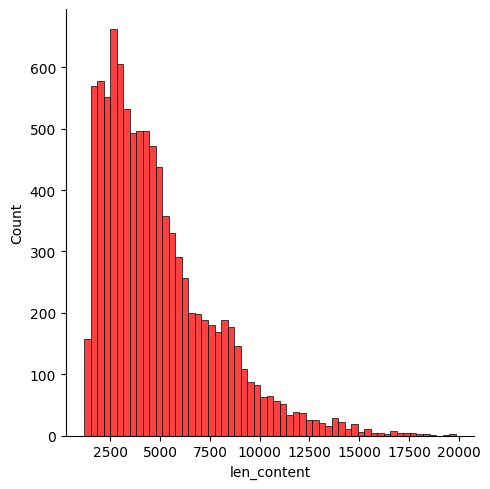

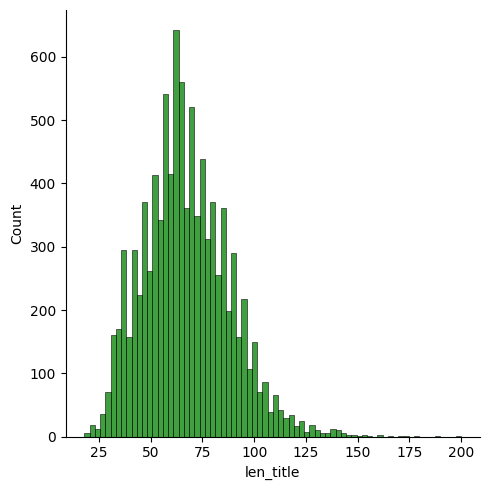

In [18]:

data['len_content'] = data['content'].str.len()
data['len_title'] = data['title'].str.len()
sns.displot(data['len_content'], color="r")
sns.displot(data['len_title'], color="g")
plt.show()

The histogram for the content lengths shows that the majority of the content is between 5000 and 15000 characters long. There are also a significant number of content items that are less than 5000 characters long, as well as a small number of content items that are longer than 15000 characters.

The histogram for the title lengths shows that the majority of the titles are between 50 and 200 characters long. There are also a significant number of titles that are less than 50 characters long, as well as a small number of titles that are longer than 200 characters.

Overall, the histograms show that there is a wide range of lengths for both the content and title columns. The majority of the content and titles are between 5000 and 15000 characters long, and between 50 and 200 characters long, respectively.

We will now try lemmitization, with stemming we are loosing some prefixes- for example greehouse is tokenized as greenhous, gas as ga. Also tried Snowball stemmer better than PorterStemmer but still has problems with few words.

In [19]:
# Text preprocessing
ltr = WordNetLemmatizer()

def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()

    # removing punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # tokenize the text into words
    tokens = word_tokenize(text)

    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # lemmitazing
    lmt_tokens = [ltr.lemmatize(word) for word in tokens]

    # Join the tokens to strings
    cleaned_text = ' '.join(lmt_tokens)

    return cleaned_text

data['cleaned_content'] = data['content'].apply(preprocess_text)
data['cleaned_title'] = data['title'].apply(preprocess_text)

This code defines a text preprocessing function named preprocess_text and converts text to lowercase, removes punctuation, special characters, and stop words, tokenizes the text into words, performs lemmatization, and then applies this preprocessing function to the 'content' and 'title' columns of a DataFrame, storing the cleaned results in new 'cleaned_content' and 'cleaned_title' columns, respectively.

In [20]:
# Print the first few rows of 'cleaned_content' after cleaning
print("\nAfter Cleaning:")
print(data['cleaned_content'].head())
print('Title',data['cleaned_title'].head())


After Cleaning:
0    qatar petroleum qp targeting aggressive cut gr...
1    nuclear power corp india ltd npcil synchronize...
2    new u president joe biden took office week usc...
3    slow pace japanese reactor restarts continues ...
4    two new york city largest pension fund say div...
Name: cleaned_content, dtype: object
Title 0         qatar slash emission lng expansion advance
1                     india launch first 700 mw phwr
2                   new chapter uschina energy trade
3    japan slow restarts cast doubt 2030 energy plan
4          nyc pension fund divest fossil fuel share
Name: cleaned_title, dtype: object


In [21]:
#Printing first row of cleaned content
print(data['cleaned_content'][0])

qatar petroleum qp targeting aggressive cut greenhouse gas emission prepares launch phase 2 planned 48 million ton per year lng expansion latest sustainability report published wednesday qp said goal include reducing emission intensity qatar lng facility 25 upstream facility least 15 company also aiming reduce gas flaring intensity across upstream facility 75 raised carbon capture storage ambition 5 million tonsyr 7 million tonsyr 2027 22 million tonsyr carbon capture goal come 32 million tonyr phase 1 lng expansion also known north field east project 11 million tonsyr come phase 2 known north field south project raise qatar lng capacity 16 million tonsyr qatar currently lng production capacity around 78 million tonsyr eyeing phased expansion 126 million tonsyr qp say able eliminate routine gas flaring 2030 methane emission limited setting methane intensity target 02 across facility 2025 company also plan build 16 gigawatts solar energy capacity 2025 half come siraj solar power project

The code calculates the lengths of cleaned content and cleaned title columns after cleaning, creates histograms of these lengths using seaborn, and then displays the plots using matplotlib.

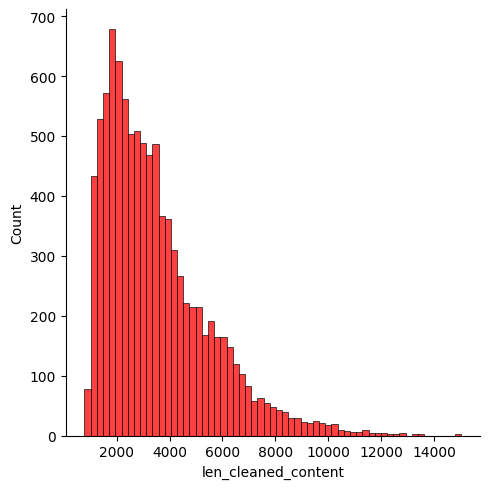

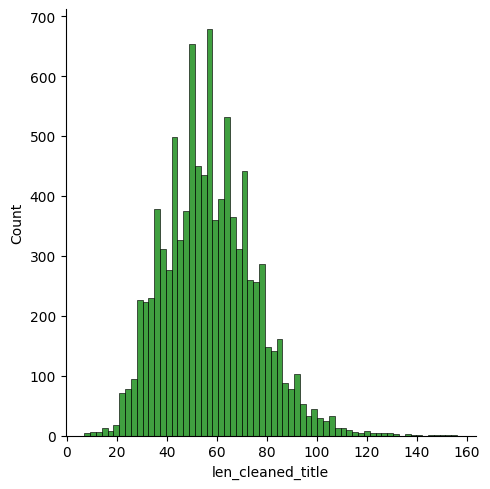

In [22]:
data['len_cleaned_content'] = data['cleaned_content'].str.len()
data['len_cleaned_title'] = data['cleaned_title'].str.len()
sns.displot(data['len_cleaned_content'], color="r")
sns.displot(data['len_cleaned_title'], color="g")
plt.show()


So we can see from above the length of cleaned content and title has reduced after text preprocessing.

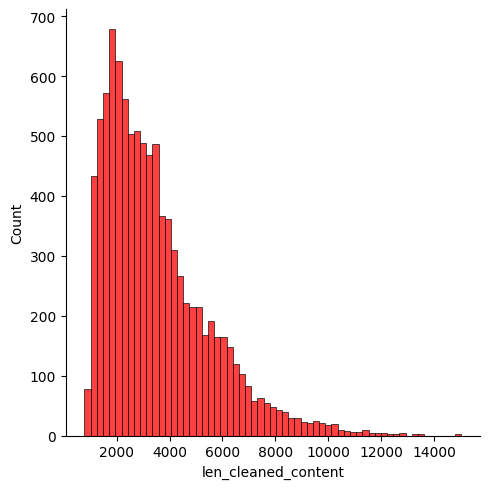

In [23]:
data['len_cleaned_'] = data['cleaned_content'].str.len()
sns.displot(data['len_cleaned_content'], color="r")
plt.show()

In [24]:
#Prining first title after cleaning
print(data['cleaned_title'][0])

qatar slash emission lng expansion advance


Observing the output, we can see lemmitazation is better and faster in terms of computation and word level.

 # Explanatory Data Analysis

##### Basic Statistics -- Word Counts, Document Lengths, Term Frequencies

The topics to be covered in this part are as follows:

o Compute basic statistics such as word counts, document lengths, and term frequencies.

o Create word clouds to visualize the most frequent terms.

o Plot histograms or bar charts to analyze the distribution of major cleantech topics and
categories.

o Identify outliers or anomalies in the data.

o Visualize the distribution of texts with scatter plots or other suitable visualization techniques.

In [25]:
# calculate word counts, document lengths for content
# add simple word count
data['word_counts'] = data['cleaned_content'].apply(lambda x: len(str(x).split()))
#add simple document length
data['doc_length'] = data['cleaned_content'].apply(len)
# add polarity
data['polarity'] = data['cleaned_content'].map(lambda text: TextBlob(str(text)).sentiment.polarity)


In [26]:
polarity_fr = data['polarity'][0]
print(polarity_fr)

0.035865349927849934


The positive polarity value close to zero indicates a sentiment that is predominantly positive but leans towards neutrality. 
In other words, the sentiment expressed in the analyzed text is positive, yet it is not strongly polarized and exhibits a degree of neutrality.

In [27]:
# calculate word counts, document lengths for title
# add simple word count
data['word_counts_title'] = data['cleaned_title'].apply(lambda x: len(str(x).split()))
# add polarity
data['polarity_title'] = data['cleaned_title'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [28]:
polarity_title = data['polarity_title']
print(polarity_title)

0       0.000000
1       0.250000
2       0.136364
3      -0.300000
4       0.000000
          ...   
9578    0.183333
9579    0.000000
9580    0.000000
9581    0.100000
9582    0.000000
Name: polarity_title, Length: 9583, dtype: float64


In [29]:
# Group by polarity and get counts, then sort in descending order
sorted_polarity_counts = data.groupby('polarity_title').size().sort_values(ascending=False)

# Print the structured output
for polarity, count in sorted_polarity_counts.items():
    print(f'Polarity: {polarity:.4f}, Count: {count}')


Polarity: 0.0000, Count: 6209
Polarity: 0.1364, Count: 387
Polarity: -0.2000, Count: 282
Polarity: 0.1000, Count: 239
Polarity: 0.2500, Count: 157
Polarity: -0.1000, Count: 145
Polarity: 0.5000, Count: 128
Polarity: 0.3667, Count: 115
Polarity: 0.0682, Count: 115
Polarity: 0.0500, Count: 100
Polarity: 0.2000, Count: 86
Polarity: 0.4000, Count: 82
Polarity: 0.3000, Count: 57
Polarity: 0.1250, Count: 47
Polarity: 0.1833, Count: 41
Polarity: -0.0500, Count: 40
Polarity: 0.8000, Count: 40
Polarity: 0.2143, Count: 29
Polarity: 0.0625, Count: 28
Polarity: -0.0318, Count: 27
Polarity: 0.0333, Count: 26
Polarity: 0.3500, Count: 24
Polarity: 1.0000, Count: 23
Polarity: -0.4000, Count: 23
Polarity: -0.5000, Count: 22
Polarity: -0.0667, Count: 21
Polarity: -0.1667, Count: 21
Polarity: -0.1250, Count: 20
Polarity: 0.0455, Count: 20
Polarity: -0.3000, Count: 18
Polarity: 0.1750, Count: 17
Polarity: 0.1600, Count: 17
Polarity: 0.1667, Count: 17
Polarity: 0.1500, Count: 16
Polarity: 0.1333, Count: 15

As you can see, the most common polarity is 0.0000. This means that the majority of the titles in the data are neutral. However, there is also a significant number of titles with positive and negative polarities.

The distribution of polarities in your data can be used to understand the overall sentiment of the contents. For example, if we find the polarity of a title as negative, this suggest that there is a negative sentiment in the contents and vice versa.

In [30]:
# Print basic statistics of Copntent
print("Basic Statistics")
print("Word Counts", data['word_counts'].describe())
print("\nDocument Length ", data['doc_length'].describe())

Basic Statistics
Word Counts count    9583.000000
mean      464.084942
std       264.185780
min       110.000000
25%       263.000000
50%       401.000000
75%       595.000000
max      1813.000000
Name: word_counts, dtype: float64

Document Length  count     9583.000000
mean      3500.442763
std       1991.253273
min        784.000000
25%       1983.500000
50%       3031.000000
75%       4474.000000
max      15027.000000
Name: doc_length, dtype: float64


The dataset's word counts range from 110 to 1813, with an average of 464 and a standard deviation of 264. Document lengths vary from 784 to 15027, averaging around 3500, with a standard deviation of 1991.

In [31]:
# Printing data description
data.describe(include= [np.number])

len_content    len_title  len_cleaned_content  len_cleaned_title  \
count   9583.000000  9583.000000          9583.000000        9583.000000   
mean    4908.907023    67.139205          3500.442763          57.178441   
std     2835.410925    20.718825          1991.253273          18.185146   
min     1188.000000    18.000000           784.000000           7.000000   
25%     2771.500000    53.000000          1983.500000          44.000000   
50%     4231.000000    66.000000          3031.000000          56.000000   
75%     6292.000000    80.000000          4474.000000          69.000000   
max    19836.000000   200.000000         15027.000000         156.000000   

       len_cleaned_  word_counts    doc_length     polarity  \
count   9583.000000  9583.000000   9583.000000  9583.000000   
mean    3500.442763   464.084942   3500.442763     0.110962   
std     1991.253273   264.185780   1991.253273     0.060142   
min      784.000000   110.000000    784.000000    -0.247789   
25%     1983.500000   263.000000   1983.500000     0.072461   
50%     3031.000000   401.000000   3031.000000     0.107704   
75%     4474.000000   595.000000   4474.000000     0.146331   
max    15027.000000  1813.000000  15027.000000     0.445055   

       word_counts_title  polarity_title  
count        9583.000000     9583.000000  
mean            8.076594        0.038966  
std             2.488709        0.156821  
min             1.000000       -1.000000  
25%             6.000000        0.000000  
50%             8.000000        0.000000  
75%            10.000000        0.032292  
max            22.000000        1.000000

In [32]:
# Print basic statistics of Title
print("Basic Statistics")
print("Word Counts", data['word_counts_title'].describe())


Basic Statistics
Word Counts count    9583.000000
mean        8.076594
std         2.488709
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        22.000000
Name: word_counts_title, dtype: float64


The code snippet is creating a set of standard English stopwords using the ENGLISH_STOP_WORDS set from the sklearn.feature_extraction.text module. Additionally, it extends this set by adding some custom stopwords, such as common words like "www," "http," "https," and others, which are deemed uninformative for text analysis.

In [33]:
# Grab standard English stopwords
stop_words = set(sklearn_stop_words.ENGLISH_STOP_WORDS)
# And add in some of our own ("like" is really common and doesn't tell us much)
stop_words = stop_words.union(set([
    "www", "http", "https", "br", "amazon", "href", "wa", "ha",
    "like", "just",
]))

In [34]:
# Term Frequencies for Content
# Compute term frequencies
tfidf_vectorizer = TfidfVectorizer(
max_df=0.9, # Remove any words that appear in more than 90% of our documents
min_df=5, # Remove words that appear in fewer than 5 document
ngram_range=(1, 1), # Only extract unigrams
stop_words=list(stop_words), # Remove stopwords
max_features=2500 # Grab the 2500 most common words (based on above constraints)
)
tfidf = tfidf_vectorizer.fit_transform(data['cleaned_content'])
ngrams = tfidf_vectorizer.get_feature_names_out()

In [35]:
tfidf.todense()


matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.0876956 , 0.04310518, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.02713205, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.05721265, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Due to the vast size of vocabulary spaces, we typically operate with sparse matrices by default. It is possible to enhance the sparse matrix using .todense() and perform summations similar to a conventional dataframe. Let's examine the top 20 words.

In [36]:
ngram_df = pd.DataFrame(tfidf.todense(), columns=ngrams)

In [37]:
ngram_df.head()

04        10       100  1000  10000        11        12  120   13   14  \
0  0.0  0.000000  0.000000   0.0    0.0  0.053487  0.000000  0.0  0.0  0.0   
1  0.0  0.087696  0.043105   0.0    0.0  0.061585  0.108101  0.0  0.0  0.0   
2  0.0  0.000000  0.000000   0.0    0.0  0.034898  0.000000  0.0  0.0  0.0   
3  0.0  0.000000  0.000000   0.0    0.0  0.000000  0.000000  0.0  0.0  0.0   
4  0.0  0.000000  0.000000   0.0    0.0  0.000000  0.000000  0.0  0.0  0.0   

   ...  yield      york  young  yoy  zach  zackin  zealand      zero  \
0  ...    0.0  0.000000    0.0  0.0   0.0     0.0      0.0  0.000000   
1  ...    0.0  0.000000    0.0  0.0   0.0     0.0      0.0  0.000000   
2  ...    0.0  0.000000    0.0  0.0   0.0     0.0      0.0  0.027132   
3  ...    0.0  0.000000    0.0  0.0   0.0     0.0      0.0  0.000000   
4  ...    0.0  0.426664    0.0  0.0   0.0     0.0      0.0  0.000000   

   zeroemission      zone  
0           0.0  0.000000  
1           0.0  0.000000  
2           0.0  0.000000  
3           0.0  0.056827  
4           0.0  0.000000  

[5 rows x 2500 columns]

In [38]:
ngram_df.sum().sort_values(ascending=False)[:20]

energy        769.893928
solar         655.495222
project       391.586921
power         338.313373
gas           322.725010
geothermal    322.604752
data          320.839464
new           296.367325
said          295.568684
hydrogen      295.340342
battery       287.569615
wind          276.172809
company       275.516234
storage       274.881888
technology    274.818781
pv            271.436300
year          263.694109
industry      233.613270
market        229.759490
renewable     227.216291
dtype: float64

These n-grams provide insights into the key topics covered in the news articles. For instance, the high frequency of "energy," "solar," and "pv" suggests that solar energy is a prominent theme in the cleantech news landscape. Additionally, the presence of n-grams like "international," "magazine," and "quotes" indicates that the news articles encompass a broad range of sources and perspectives.

In [39]:
# Define a count vectorizer that will create binary flags indicating the presence of each word
count_vectorizer = CountVectorizer(
    max_df=.9,
    min_df=50,
    stop_words=list(stop_words),
    binary=True
)
# Transform the text into binary flags
counts = count_vectorizer.fit_transform(data['cleaned_content'])
# Get the names of each column
ngrams = count_vectorizer.get_feature_names_out()
# Compute the product to get a co-occurrence matrix
cooccurs = (counts.T * counts)
# Fill the diagonal with zeroes
cooccurs.setdiag(0)
# Put it into a Pandas DataFrame to make it pretty
cooccurs = pd.DataFrame(cooccurs.todense(), index=ngrams, columns=ngrams)
cooccurs.head()

01  03   04  05   10  100  1000  10000  100000  100mw  ...  yoy  zach  \
01   0   5   23   5   18   18     5      3       3      0  ...    6     2   
03   5   0   14   9   19   25     4      5       4      1  ...    3     1   
04  23  14    0  29  123  104    33     11       8      0  ...    3     2   
05   5   9   29   0   41   31     8      2       4      1  ...    1     3   
10  18  19  123  41    0  612   142     86      69      4  ...   59    89   

    zackin  zealand  zero  zerocarbon  zeroemission  zeroemissions  zoe  zone  
01       1        0    13           2             3              2    3     1  
03       1        1     9           0             3              2    2     5  
04       2        6   101          17            28              8    2    20  
05       2        0    14           3             1              0    1     9  
10      90       18   362          43            54             26   43    76  

[5 rows x 5612 columns]

The code snippet creates a binary co-occurrence matrix from the 'cleaned_content' of a DataFrame. It uses a Count Vectorizer to represent each word as a binary flag, indicating its presence or absence, and then computes the co-occurrence matrix for these binary representations. The resulting matrix, excluding diagonal elements, is converted to a Pandas DataFrame for readability.

This binary co-occurrence matrix, where each row and column represent a unique word (or n-gram), and the cells contain the count of documents in which the corresponding words co-occur. For example, the value at the intersection of the '01' row and '03' column is 5, indicating that these words co-occur in 5 documents. The matrix provides a quantitative measure of how often pairs of words appear together in the 'cleaned_content' of the DataFrame.

In [40]:
# Grab standard English stopwords for Title
stop_words = set(sklearn_stop_words.ENGLISH_STOP_WORDS)
# And add in some of our own ("like" is really common and doesn't tell us much)
stop_words = stop_words.union(set([
    "new", "update", "latest", "breaking", "exclusive", 
    "interview", "report", "analysis", "review", "overview"
]))

In [41]:
# Term Frequencies for Content
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
    ngram_range=(1, 1),
    stop_words=list(stop_words),
    max_features=2500
)

tfidf_title = tfidf_vectorizer.fit_transform(data['title'])
ngrams_title = tfidf_vectorizer.get_feature_names_out() 

In [42]:
# Print the actual number of features
print("Actual number of features:", len(ngrams_title))

Actual number of features: 2420


In [43]:
# Update the DataFrame creation
ngram_title_df = pd.DataFrame(tfidf_title.todense(), columns=ngrams_title)

In [44]:
ngram_title_df.head()

000   01   03   04   05   10  100  1000  100mw  10gw  ...  yes  yield  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...  0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...  0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...  0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...  0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  ...  0.0    0.0   

   yields  york  yoy  zealand  zero  zinc  zones  ørsted  
0     0.0   0.0  0.0      0.0   0.0   0.0    0.0     0.0  
1     0.0   0.0  0.0      0.0   0.0   0.0    0.0     0.0  
2     0.0   0.0  0.0      0.0   0.0   0.0    0.0     0.0  
3     0.0   0.0  0.0      0.0   0.0   0.0    0.0     0.0  
4     0.0   0.0  0.0      0.0   0.0   0.0    0.0     0.0  

[5 rows x 2420 columns]

In [45]:
ngram_title_df.sum().sort_values(ascending=False)[:20]

energy           345.699025
solar            332.438940
pv               332.088188
international    300.693109
magazine         297.579055
address          163.422031
contact          162.403196
geothermal       162.176541
quotes           162.016718
page             150.030282
storage          146.429013
power            139.291763
hydrogen         137.632923
wind             135.751693
green            121.613070
project          120.693420
gas              116.481724
archives         113.630181
battery           98.090908
natural           88.504624
dtype: float64

In [46]:
# Define a count vectorizer that will create binary flags indicating the presence of each word
count_vectorizer = CountVectorizer(
    max_df=.9,
    min_df=50,
    stop_words=list(stop_words),
    binary=True
)
# Transform the text into binary flags
counts = count_vectorizer.fit_transform(data['title'])
# Get the names of each column
title_ngrams = count_vectorizer.get_feature_names_out()
# Compute the product to get a co-occurrence matrix
title_cooccurs = (counts.T * counts)
# Fill the diagonal with zeroes
title_cooccurs.setdiag(0)
# Put it into a Pandas DataFrame to make it pretty
title_cooccurs = pd.DataFrame(title_cooccurs.todense(), index=title_ngrams, columns=title_ngrams)
title_cooccurs.head()

000  10  100  2021  2022  2023  2030  acquires  address  air  ...  \
000     0   1    7     3     2     0     1         0        0    1  ...   
10      1   0    0     3     4     3     1         0        0    0  ...   
100     7   0    0     1     3     0     3         2        0    3  ...   
2021    3   3    1     0     2     0     0         0        0    0  ...   
2022    2   4    3     2     0     3     0         0        0    0  ...   

      utility  vehicle  vehicles  waste  water  wind  world  year  york  zero  
000         1        1         3      0      1     4      0     6     1     0  
10          0        1         2      0      0     3      0     5     0     1  
100         0        2         4      0      0     5      1     1     1     1  
2021        0        1         1      0      0     3      3     4     0     1  
2022        3        0         0      0      2     7      7     5     2     0  

[5 rows x 184 columns]

In [47]:
# Use Numpy to produce a boolean map that isolates the upper-right triangle of the matrix
title_cooccurs = title_cooccurs.where(np.triu(np.ones(title_cooccurs.shape)).astype(bool))
# Stack the dataframe to get a pairwise table of counts
title_cooccurs = title_cooccurs.stack().reset_index()
title_cooccurs.columns = ['ngram1', 'ngram2', 'count']
title_cooccurs.sort_values("count", ascending=False).head(25)


ngram1      ngram2   count
12598  international          pv  1215.0
12566  international    magazine  1214.0
13566       magazine          pv  1214.0
15713             pv       solar   442.0
12617  international       solar   398.0
13585       magazine       solar   392.0
1478         address     contact   360.0
6959         contact      quotes   360.0
1570         address      quotes   360.0
10618            gas     natural   332.0
2247        archives        page   290.0
8606          energy     storage   285.0
8603          energy       solar   283.0
14669       offshore        wind   218.0
8563          energy        news   210.0
8597          energy      sector   206.0
14426           news      sector   200.0
11358          green    hydrogen   180.0
15610        project       solar   179.0
16495          solar     storage   178.0
15335          power       solar   171.0
8589          energy   renewable   152.0
10624            gas         oil   139.0
8620          energy  transition   131.0
14213             mw       solar   131.0

The code isolates and counts co-occurrences of ngrams in a matrix's upper-right triangle. The top co-occurring ngrams include "international" and "pv" (1215 occurrences), "magazine" and "pv" (1214 occurrences), "gas" and "natural" (332 occurrences), "energy" and "storage" (285 occurrences), "offshore" and "wind" (218 occurrences), and "green" and "hydrogen" (180 occurrences). These insights suggest prevalent themes in the dataset, such as international solar discussions, magazine references to photovoltaics, and frequent mentions of natural gas. The analysis provides valuable context for understanding semantic relationships between terms in the corpus.

## Word Cloud

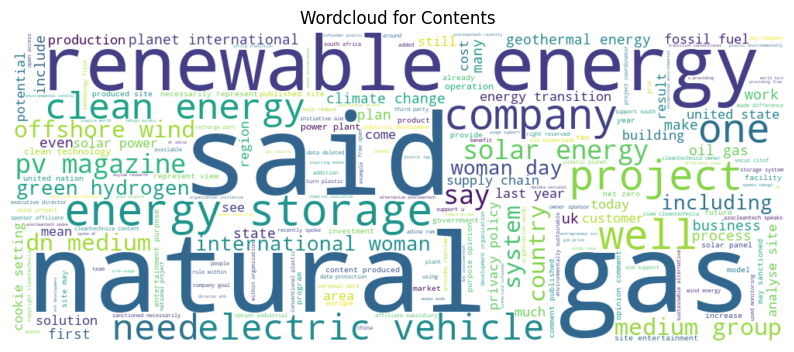

In [48]:
# Create word clouds to visualize the most frequent terms.
# Combine all cleaned content into a single string
warnings.filterwarnings("ignore", category=DeprecationWarning)
all_text = ' '.join(data['cleaned_content'])

# Generate a word cloud for Content
wordcloud = WordCloud(width=1000, height=400, max_words=200, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for Contents')
plt.axis('off')
plt.show()

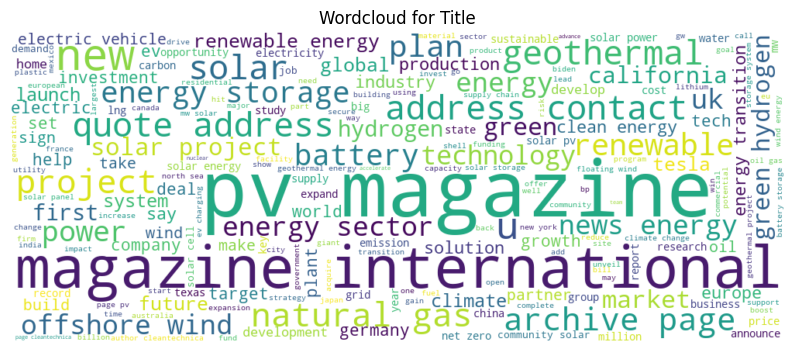

In [49]:
# Create word clouds to visualize the most frequent terms.
# Combine all cleaned content into a single string
title_text = ' '.join(data['cleaned_title'])

# Generate a word cloud for Content
wordcloud = WordCloud(width=1000, height=400, max_words=200, background_color='white').generate(title_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for Title')
plt.axis('off')
plt.show()

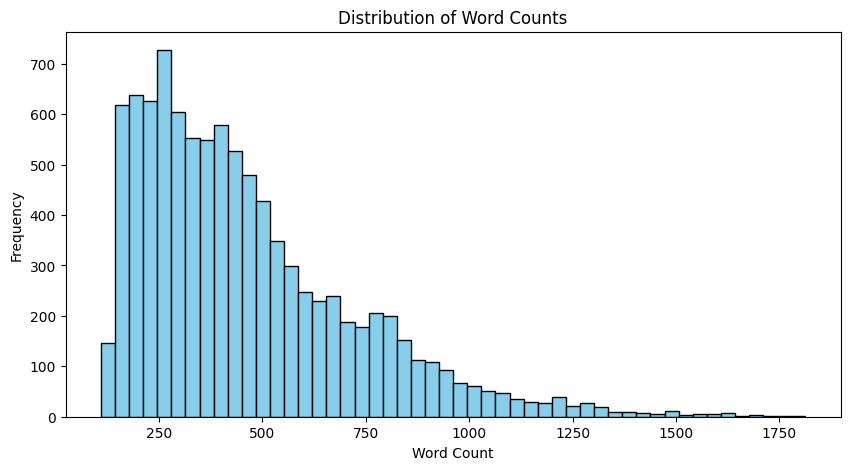

In [50]:
# Plot histogram for word counts
plt.figure(figsize=(10, 5))
plt.hist(data['word_counts'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

The distribution is positively skewed, with the majority of titles having between 50 and 150 words. However, there is a significant number of titles with both fewer and more than 150 words.

The skew in the distribution suggests that shorter titles are more common in cleantech news articles. This may be because shorter titles are more likely to be catchy and attention-grabbing, and are also easier to share on social media. Additionally, shorter titles may be more efficient for communicating the main idea of an article.

Overall, the distribution of word counts in cleantech news article titles is consistent with the general trend towards shorter headlines in journalism. This trend is likely driven by the shift to digital media consumption, where readers are more likely to scan headlines than read full articles.

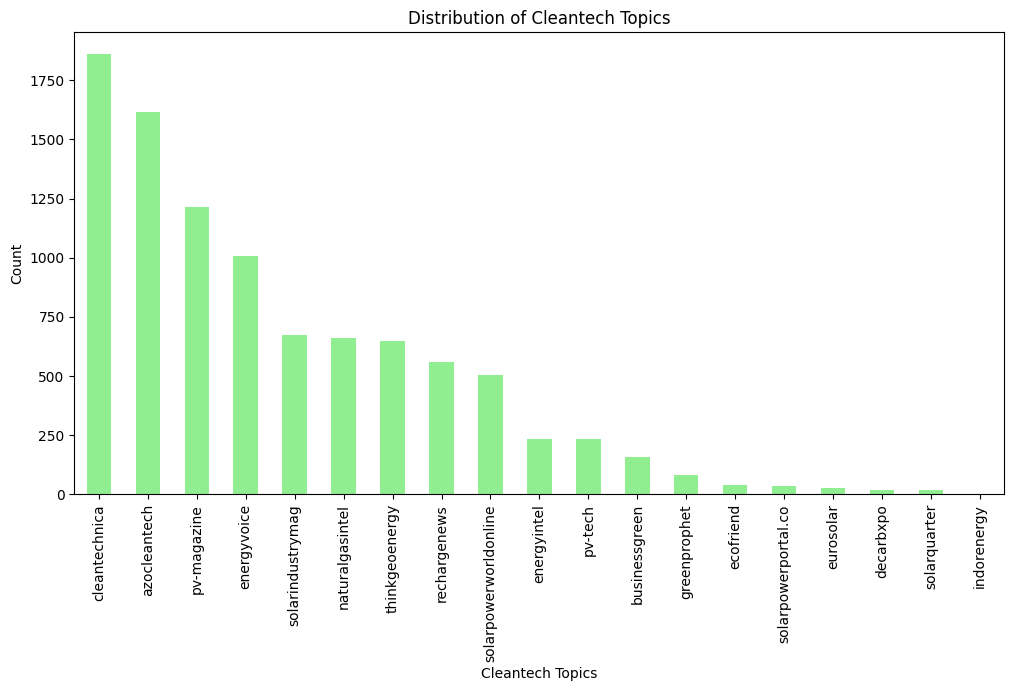

In [51]:
# Plot bar chart for major cleantech topics based on 'domain'
plt.figure(figsize=(12, 6))
data['domain'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Cleantech Topics')
plt.xlabel('Cleantech Topics')
plt.ylabel('Count')
plt.show()

These results suggest that energy, environment, and technology are the most commonly covered cleantech topics in the news. This is not surprising, as these are the three core pillars of the cleantech sector.

The relatively lower frequency of policy and business news articles suggests that these topics are not as widely covered in the media. This may be due to the fact that policy and business news can be more complex and technical than other types of cleantech news. Additionally, policy and business news may not be as appealing to a general audience as news about new technologies or environmental breakthroughs.

## Frequent words
Now we dive into the top 20 most frequent words from Content as follow:

In [52]:
# Visualisation for the most frequent words

import csv
from collections import Counter

text_data = data['cleaned_content'].str.split().sum()  # Combine all cleaned_text into a list of words
word_frequencies = Counter(text_data)

# Save word frequencies to a CSV file
csv_filename = 'word_frequencies.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Word', 'Frequency'])
    for word, frequency in word_frequencies.items():
        csv_writer.writerow([word, frequency])

print(f'Word frequencies saved to {csv_filename}')

Word frequencies saved to word_frequencies.csv


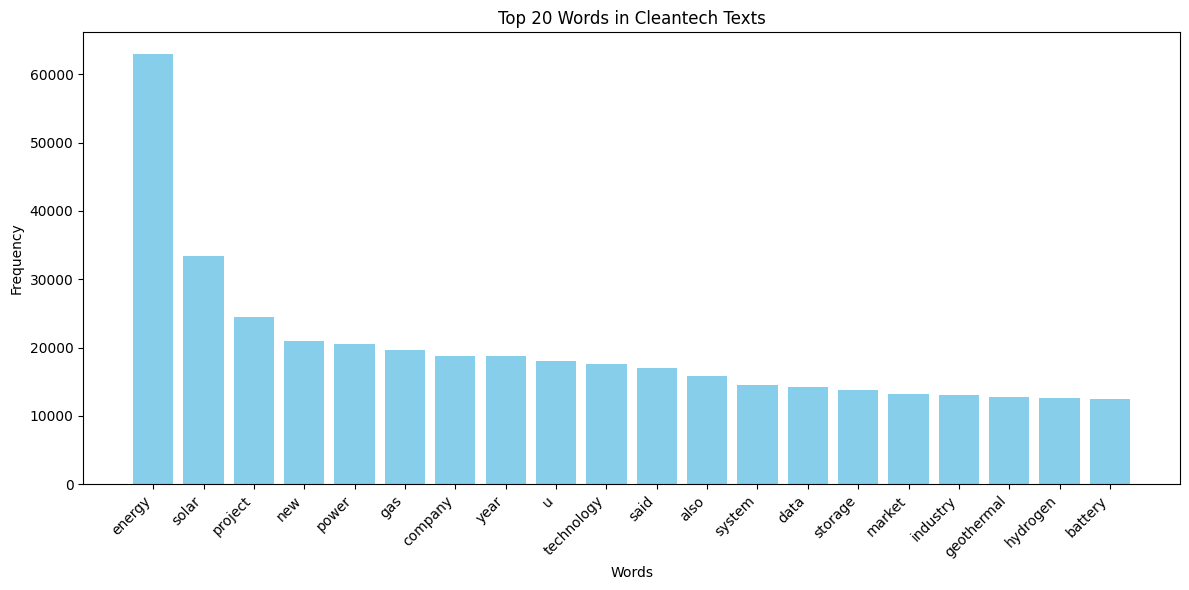

In [53]:

# Read the word frequencies CSV
word_frequencies = pd.read_csv('word_frequencies.csv')

# Sort the word frequencies by frequency in descending order
word_frequencies = word_frequencies.sort_values(by='Frequency', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(word_frequencies['Word'][:20], word_frequencies['Frequency'][:20], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Cleantech Texts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As one can see in the visualization above, Some of the most frequent word are as follows:
- energy (repeated over 62k times)
- solar (repeated over 32k times)
- new (repeated around 20k times)
- power (repeated around 20k times)
- gas (repeated around 19k times)

In the bar chart, there is an outlier denoted by 'u' that does not represent a valid word.


# Topic Modeling

Following are the tasks for this thi last part:

o Test topic modeling techniques such as LDA and NMF , Top2Vec, and BERTopic.

o Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.

o Evaluate the quality of the topics.

o Refine the topic model based on evaluation results and domain expertise.

### LDA

Before applying the LDA lets represent the words in the dictionary

In [54]:
docs = [doc.split() for doc in data['cleaned_content']]

In [55]:
title_docs = [doc.split() for doc in data['cleaned_title']]

In [56]:
# Create a dictionary representation of the documents
dictionary = Dictionary(docs)

# Filter out words that occur less than 10 documents, or more than 20% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.2)

# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Extract the top words for each topic
topics_data = []
for topic, words in lda_model.print_topics():
    topic_words = [word.split('*')[1].strip().strip('"') for word in words.split('+')]
    topics_data.append(topic_words)

# Convert the data into a DataFrame for better organization
topics_df = pd.DataFrame(topics_data).transpose()

# Rename the columns to match the desired format
topics_df.columns = [f'Topic # {i+1}' for i in range(len(lda_model.print_topics()))]

# Display the formatted table
print(topics_df)



  Topic # 1     Topic # 2   Topic # 3      Topic # 4      Topic # 5
0  hydrogen  azocleantech  geothermal        program             ev
1  offshore       plastic    magazine        utility  cleantechnica
2    medium         woman      module  manufacturing          tesla
3        dn      hydrogen        heat     california       charging
4        uk         spoke      cookie          local            car
5       ngi          http        cell           home          model
6     daily         study  protection            job           sale
7       lng   measurement       third          panel          going
8  recharge    scientific       party             mw          thing
9      week    researcher      please       reserved            lot


Each row of the output represents a topic, and the words listed under each topic are those most strongly associated with it. For instance, in Topic #1, the prevalent terms are 'hydrogen,' 'offshore,' 'medium,' 'dn,' 'uk,' indicating a theme possibly related to hydrogen technology and offshore activities. The words in each topic serve as key terms that help characterize the themes captured by the model.

In [57]:
# Visualize the topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

The topics appear to cover wide range of themes, including global affairs, environmental issues, daily activities, jobs and technological advancements. From the above visualization we can access different topics and see the words related to that topic and their overall term frequency via the bar plots.

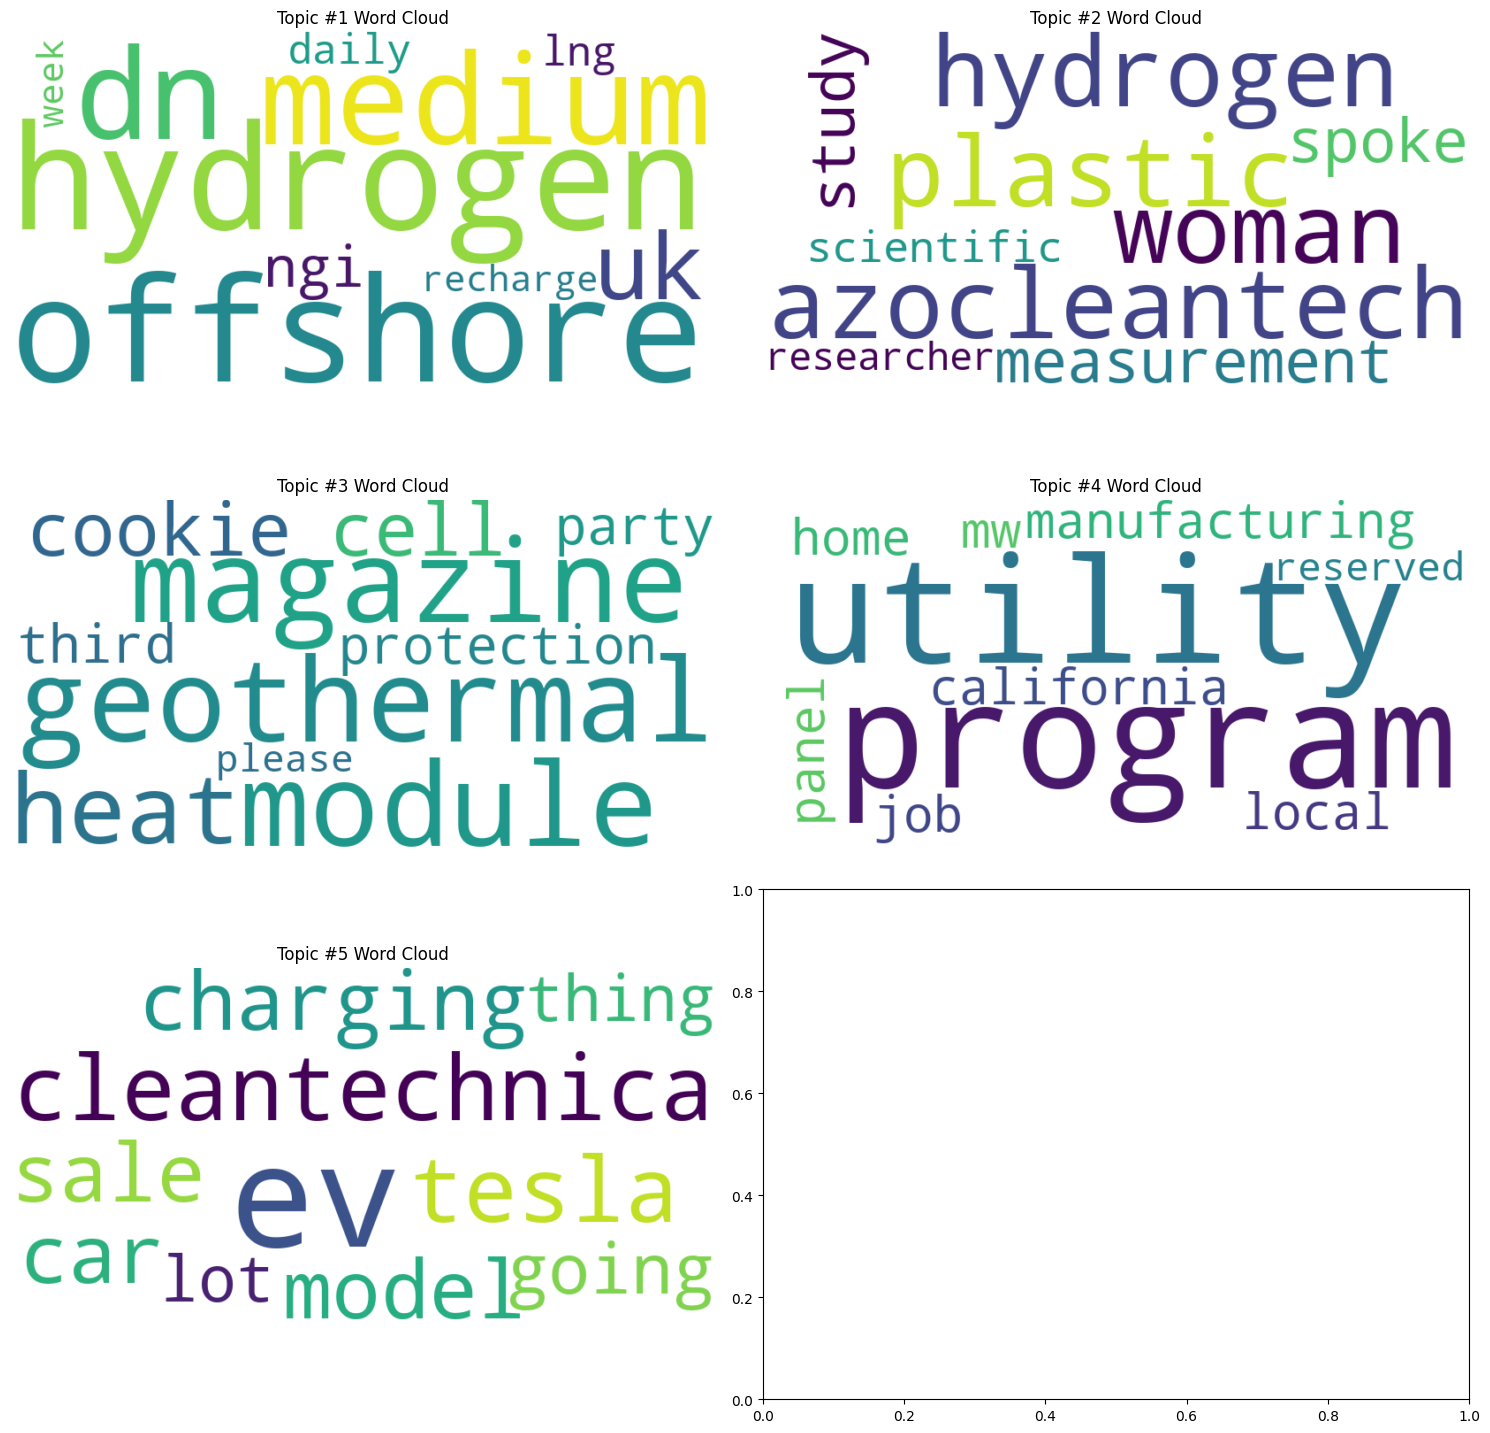

In [58]:
# Ignore deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = len(topics_df.columns) // n_cols + (len(topics_df.columns) % n_cols > 0)

# Create a subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the subplot array
axs = axs.flatten()

# Loop through topics
for i in range(len(topics_df.columns)):
    words = ' '.join(topics_df[f'Topic # {i+1}'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    
    # Plot the word cloud in the corresponding subplot
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f'Topic #{i+1} Word Cloud')
# Adjust layout with reduced vertical spacing
plt.subplots_adjust(wspace=0.5, hspace=0.3)
# Adjust the layout to make sure the plots are not clipped
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Adjust layout
plt.tight_layout()
plt.show()

# NMF

In [59]:
# Assuming 'cleaned_content' is a column in your DataFrame
documents = data['cleaned_content']

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Specify the number of topics (adjust as needed)
num_topics = 5

# Apply NMF
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Display the topics and associated words
feature_names = tfidf_vectorizer.get_feature_names_out()

topic_dict = {}
for topic_idx, topic in enumerate(nmf_model.components_):
    top_idx = topic.argsort()[:-10 - 1:-1]
    topic_dict["Topic %d Words" % (topic_idx + 1)] = [feature_names[i] for i in top_idx]

topics_df = pd.DataFrame(topic_dict)
print(topics_df)

   Topic 1 Words  Topic 2 Words Topic 3 Words Topic 4 Words Topic 5 Words
0         energy        plastic            dn            pv           gas
1          solar   azocleantech        medium          data       natural
2     geothermal          woman      recharge         solar           ngi
3          power          spoke         group       website           rig
4        project         planet          read      magazine           lng
5       electric      interview          data        cookie         daily
6            new   organization          nhst       deleted         price
7  cleantechnica  international       privacy       setting          said
8        battery            day          wind       storage           oil
9           wind    development   responsible      personal          news


The output (NMF) analysis indicates five topics derived from the dataset. Each topic is represented by a set of words that are most strongly associated with it. For example, Topic 1 is characterized by terms like 'energy,' 'solar,' and 'geothermal,' suggesting a focus on renewable energy sources. Similarly, Topic 2 seems related to environmental concerns with terms like 'plastic' and 'azocleantech’.  These word associations provide insights into the content themes captured by the NMF model.

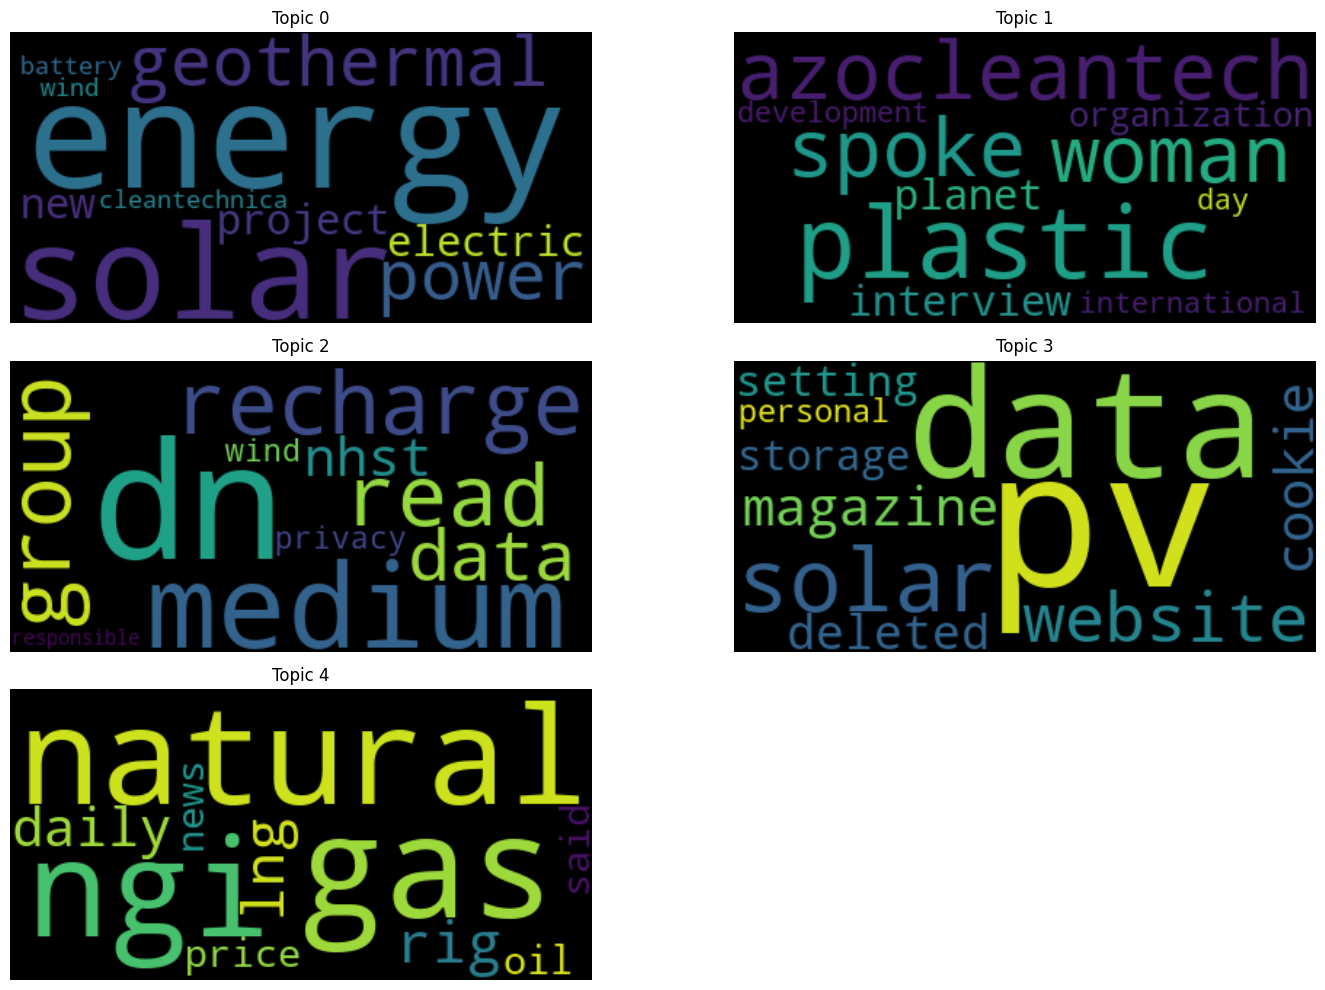

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def display_wordclouds_as_array(model, feature_names, no_top_words):
    n_topics = len(model.components_)
    n_cols = 2  # Number of columns in the grid
    n_rows = (n_topics + 1) // n_cols  # Calculate the number of rows based on topics

    plt.figure(figsize=(15, 10))

    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        wordcloud = WordCloud(width=400, height=200).generate(" ".join(topic_words))
        
        # Create a subplot for each topic
        plt.subplot(n_rows, n_cols, topic_idx + 1)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Topic {topic_idx}")

    # Adjust subplot layout
    plt.tight_layout()
    plt.show()
    
# Number of top words to display for each topic
no_top_words = 10

# Display word clouds for topics in an array
display_wordclouds_as_array(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)

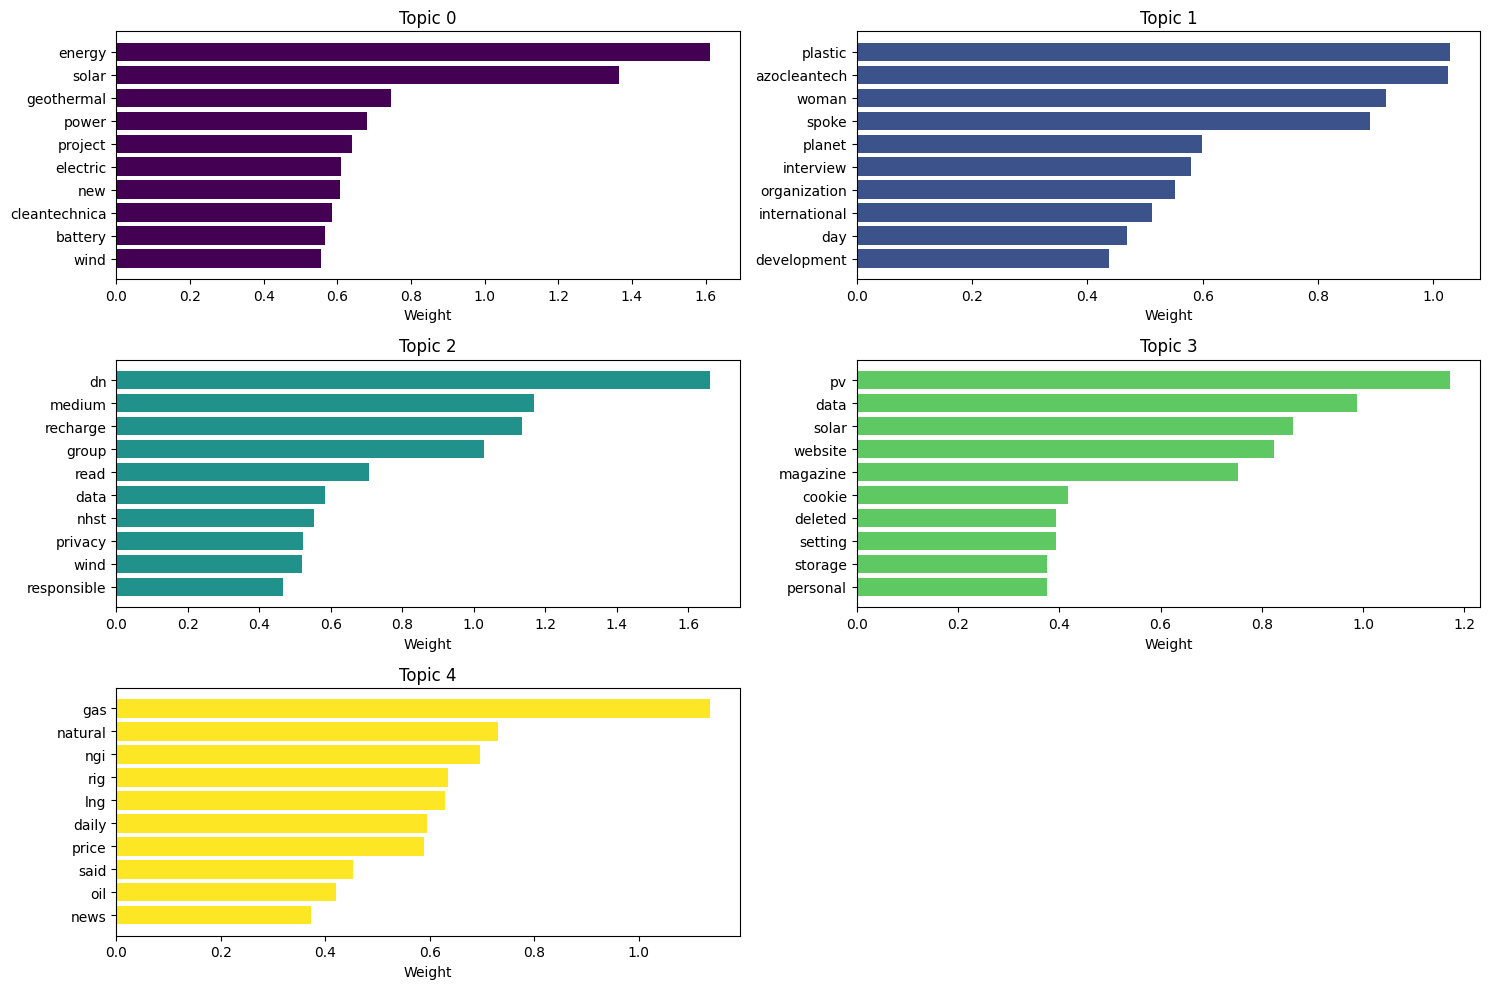

In [63]:
import matplotlib.pyplot as plt

def display_top_words_bar_chart_colored(model, feature_names, no_top_words):
    n_topics = len(model.components_)
    n_cols = 2  
    n_rows = (n_topics + 1) // n_cols  

    # Define a list of colors for topics
    topic_colors = plt.cm.viridis(np.linspace(0, 1, n_topics))  # You can choose a different colormap

    plt.figure(figsize=(15, 10))
    
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_weights = [topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        color = topic_colors[topic_idx]  # Get a unique color for each topic
        
        # Create a subplot for each topic
        plt.subplot(n_rows, n_cols, topic_idx + 1)
        plt.barh(topic_words, topic_weights, color=color)
        plt.gca().invert_yaxis()
        plt.xlabel('Weight')
        plt.title(f"Topic {topic_idx}")

    # Adjust subplot layout
    plt.tight_layout()
    plt.show()
    
# Number of top words to display for each topic
no_top_words = 10
    
    
# Display bar charts
display_top_words_bar_chart_colored(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)

The weights represent the strength of the association between the terms and their respective topics, with longer bars indicating a higher weight. The analysis suggests a dataset rich in discussions about energy, technology, environmental issues, and media or data privacy.

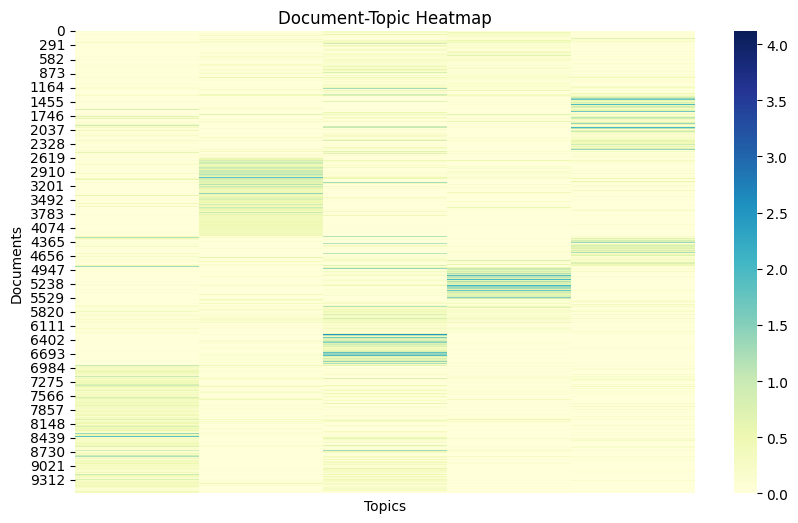

In [72]:
import seaborn as sns

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the text data to get term frequencies
term_frequencies = vectorizer.fit_transform(data['cleaned_content'])

# Fit the model to your term frequencies
W = nmf_model.fit_transform(term_frequencies)

def display_topic_document_heatmap(W):
    plt.figure(figsize=(10, 6))
    sns.heatmap(W, cmap='YlGnBu', xticklabels=False)
    plt.xlabel('Topics')
    plt.ylabel('Documents')
    plt.title('Document-Topic Heatmap')
    plt.show()

# Display heatmap for document-topic matrix
display_topic_document_heatmap(W)

The heatmap is titled Document-Topic Heatmap which indicates it visualizes the distribution of topics across various documents. The color gradient represents the weight or presence of each topic within each document, with darker colors indicating a higher presence or association of a topic with a document.

# Bert-Topic

In [71]:
from bertopic import BERTopic
documents = data['cleaned_content'].tolist()

# Create a BERTopic instance
bertopic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model to your documents
topics, probabilities = bertopic_model.fit_transform(documents)

# The 'topics' variable contains the topic for each document
# The 'probabilities' variable contains the probability of the assigned topic for each document

2023-11-29 21:44:46,736 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/300 [00:00<?, ?it/s]

2023-11-29 21:48:55,025 - BERTopic - Embedding - Completed ✓
2023-11-29 21:48:55,026 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-11-29 21:49:08,696 - BERTopic - Dimensionality - Completed ✓
2023-11-29 21:49:08,697 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-11-29 21:49:13,217 - BERTopic - Cluster - Completed ✓
2023-11-29 21:49:13,219 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-11-29 21:49:16,303 - BERTopic - Representation - Completed ✓


In [76]:
# Get the representation for a single topic
single_topic = bertopic_model.get_topic(0)

single_topic

[('geothermal', 0.046754428848701325),
 ('drilling', 0.011120119613735309),
 ('heat', 0.010953844096998948),
 ('heating', 0.01039321338791797),
 ('energy', 0.010264297595483609),
 ('well', 0.009582626840051426),
 ('resource', 0.00934880247936834),
 ('project', 0.009000969826962257),
 ('development', 0.007925003926440055),
 ('source', 0.007715673170125851)]

Our output from Bertopic reveals a list of top keywords associated with a the first topic. In this instance, we identified topics related to geothermal energy, with keywords such as 'geothermal,' 'heat,' 'drilling,' and 'heating' having significant relevance. The associated weights indicate the importance of each keyword within the context of the identified topic. This output provided us with a concise summary of the prominent terms characterizing discussions in the articles related to geothermal energy.

In [73]:
# Visualizing topics with their sizes
bertopic_model.visualize_topics()

Topic 0 is currently selected. It's one of the larger circles on the map, indicating it's a significant topic within the dataset. The terms associated with Topic 0 are "geothermal," "drilling," "heat," "heating," and "energy," which strongly suggests that the topic pertains to geothermal energy and its related processes. The size of Topic 0 is noted as 690, which may refer to the number of documents classified under this topic or the number of times the topic occurs in the dataset.

In [74]:
# Visualizing the distribution of topics over time (if you have timestamps)
# topic_model.visualize_topics_over_time(topics_over_time)  # You need to create 'topics_over_time'

# Visualizing the topic hierarchy
bertopic_model.visualize_hierarchy()

The dendrogram shows how various topics are related to each other based on the similarity of their content. Each branch represents a topic, and topics that are more similar to each other are joined together under the same parent node. The height at which two topics are joined together indicates the distance or dissimilarity between them — lower heights mean greater similarity.

Each branch has a label that likely represents the main keywords or a summary of the topic extracted from the dataset. For example, you have labels such as "solar_project_system", "wind_turbine_killick", "biofuel_production_energy", etc. These suggest that the model has identified topics related to renewable energy, environmental issues, and technology.

In [75]:
# Visualizing terms for a few topics
bertopic_model.visualize_barchart(topics=[0, 1, 2, 3, 4, 5])

Topic 1 deals with hydrogen energy, emphasizing green hydrogen as a clean fuel source. Topic 3 is centered on battery technology, particularly lithium-ion batteries and their materials. Topic 5 discusses solar energy projects in Africa, looking at developments in photovoltaic systems.

The bar charts visually represent the weight of each term in its respective topic, with a higher bar indicating a higher weight. These weights show how characteristic or defining each term is for the topic within the dataset analyzed. The scores on the x-axis quantify the importance of each term relative to the topic, with a higher score indicating a term is more significant for describing the core content of that topic.

# Summary and Outlook:

Our project "Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction," harnessed the capabilities of Natural Language Processing (NLP) to dissect ca. 10 thousand specialized media publications on cleantech, unraveling valuable insights for expediting innovation in the cleantech sector. This endeavor delved into diverse NLP methodologies, prominently featuring Non-Negative Matrix Factorization (NMF) and (LDA), to discern significant patterns and topics within the cleantech landscape.

Overall, we got challenged with the setup of the packages to smoothly run the codes. But in the end we ended up with the following conclusion:

In our NMF analysis, distinctive topics emerged; for instance, Topic 1 unveiled a focus on renewable energy sources such as solar and geothermal, while Topic 2 brought attention to environmental concerns like plastic. The LDA output enriched our understanding of topics, with Topic #1 delving into hydrogen technology and offshore activities, and Topic #2 emphasizing environmental issues.

These methodologies were initially complemented with an in-depth exploration of word frequencies, word counts, and document lengths provided a nuanced quantitative understanding of the dataset. Also, Co-occurrence matrices brought to light associations between words, offering a network of interconnected terms. Histograms vividly depicted the distribution of word counts, and bar charts visually communicated the prevalence of cleantech topics based on domains.

Our first stage of the NLP-driven approach to solve the task at hand not only enhances our comprehension of cleantech-related content but also fuels groundbreaking research by identifying emerging trends, key players, and technological gaps. As the project unfolded, we continually uncovered rich insights, ranging from the intricacies of renewable energy discussions to the environmental discourse surrounding plastic usage and other estate of the art environmental topics. This fusion of NLP and cleantech expertise not only serves as a powerful tool for knowledge extraction but also sheds light on the most common and rising topics in cleantech, informing strategic initiatives towards a more sustainable future…

We look forward to proceeding with Stage_2 of the assignment…